In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


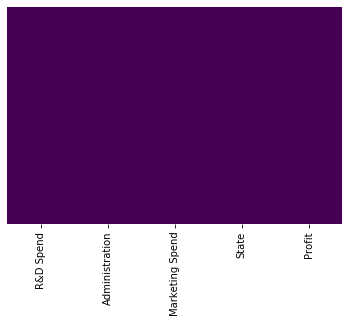

In [3]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [4]:
state = pd.get_dummies(df['State'],drop_first=True)
state.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [5]:
df = pd.concat([df, state],axis=1)
df.drop('State', inplace=True, axis=1)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [6]:
X = df.drop('Profit', axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [7]:
y = df['Profit']
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.30, 
                                                    random_state=101)

In [9]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

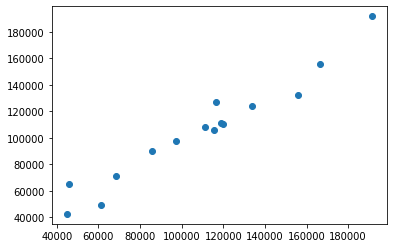

In [10]:
y_pred = lm.predict(X_test)
plt.scatter(y_pred, y_test)

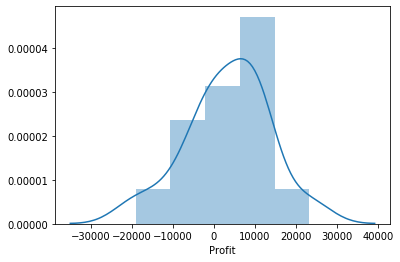

In [11]:
sns.distplot(y_pred - y_test)

In [18]:
intercept_df = pd.DataFrame(data=np.ones(50), columns=['Constant'])
X = pd.concat([X, intercept_df],axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York,Constant,Constant,Constant
0,165349.20,136897.80,471784.10,0,1,1.0,1.0,1.0
1,162597.70,151377.59,443898.53,0,0,1.0,1.0,1.0
2,153441.51,101145.55,407934.54,1,0,1.0,1.0,1.0
3,144372.41,118671.85,383199.62,0,1,1.0,1.0,1.0
4,142107.34,91391.77,366168.42,1,0,1.0,1.0,1.0


In [20]:
import statsmodels.api as smapi
X_opt = X

In [21]:
regressor_OLS = smapi.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           1.34e-27
Time:                        16:14:08   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.8060      0.046     17.369      0.000       0.712       0.900
Administration     -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing Spend     0.0270      0.017      1.574      0.123      -0.008       0.062
Florida           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
New York          -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
Constant         1.671e+04   2294.940      7.281      0.000    1.21e+04    2.13e+04
Constant         1.671e+04   2294.940      7.281      0.000    1.21e+04    2.13e+04
Constant         1.671e+04   2294.940      7.281      0.000    1.21e+04    2.13e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     2.33e+37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.14e-63. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [24]:
X_opt = X.drop('New York', axis=1)
regressor_OLS = smapi.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           8.49e-29
Time:                        16:53:23   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.8060      0.046     17.606      0.000       0.714       0.898
Administration     -0.0270      0.052     -0.523      0.604      -0.131       0.077
Marketing Spend     0.0270      0.017      1.592      0.118      -0.007       0.061
Florida           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
Constant          1.67e+04   2215.957      7.537      0.000    1.22e+04    2.12e+04
Constant          1.67e+04   2215.957      7.537      0.000    1.22e+04    2.12e+04
Constant          1.67e+04   2215.957      7.537      0.000    1.22e+04    2.12e+04
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     8.41e+37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.48e-64. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [26]:
X_opt = X.drop(['New York', 'Florida'], axis=1)
regressor_OLS = smapi.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           4.53e-30
Time:                        16:54:00   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
Constant         1.671e+04   2190.784      7.626      0.000    1.23e+04    2.11e+04
Constant         1.671e+04   2190.784      7.626      0.000    1.23e+04    2.11e+04
Constant         1.671e+04   2190.784      7.626      0.000    1.23e+04    2.11e+04
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     3.86e+37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.6e-63. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [27]:
X_opt = X.drop(['New York', 'Florida', 'Administration'], axis=1)
regressor_OLS = smapi.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           2.16e-31
Time:                        16:54:12   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.7966      0.041     19.266      0.000       0.713       0.880
Marketing Spend     0.0299      0.016      1.927      0.060      -0.001       0.061
Constant         1.566e+04    896.644     17.464      0.000    1.39e+04    1.75e+04
Constant         1.566e+04    896.644     17.464      0.000    1.39e+04    1.75e+04
Constant         1.566e+04    896.644     17.464      0.000    1.39e+04    1.75e+04
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     3.93e+37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.13e-63. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""